In [0]:
"""

      Import all Headers file of keras tensorflow and scikit-learn



"""

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


ক-ল্যাব থেকে ডাটাসেট ইম্পোর্ট করার জন্য

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
print('Files in Drive:')
!ls drive/

Files in Drive:
'cg-dipta vai.pdf'  'Colab Notebooks'		      m4326svd_example.pdf
 Classroom	    'How to get started with Drive'   Sharif_resume_.pdf


In [0]:
X=[]
Z=[]
img_size=150
class_1='drive/Colab Notebooks/oxfordflower17/train/class_1'
class_2='drive/Colab Notebooks/oxfordflower17/train/class_2'
class_3='drive/Colab Notebooks/oxfordflower17/train/class_3'
class_4='drive/Colab Notebooks/oxfordflower17/train/class_4'
class_5='drive/Colab Notebooks/oxfordflower17/train/class_5'
class_6='drive/Colab Notebooks/oxfordflower17/train/class_6'
class_7='drive/Colab Notebooks/oxfordflower17/train/class_7'
class_8='drive/Colab Notebooks/oxfordflower17/train/class_8'
class_9='drive/Colab Notebooks/oxfordflower17/train/class_9'
class_10='drive/Colab Notebooks/oxfordflower17/train/class_10'
class_11='drive/Colab Notebooks/oxfordflower17/train/class_11'
class_12='drive/Colab Notebooks/oxfordflower17/train/class_12'
class_13='drive/Colab Notebooks/oxfordflower17/train/class_13'
class_14='drive/Colab Notebooks/oxfordflower17/train/class_14'
class_15='drive/Colab Notebooks/oxfordflower17/train/class_15'
class_16='drive/Colab Notebooks/oxfordflower17/train/class_16'
class_17='drive/Colab Notebooks/oxfordflower17/train/class_17'


In [0]:
import cv2
img = cv2.imread('drive/Colab Notebooks/oxfordflower17/train/class_1/image_0001.jpg',cv2.IMREAD_COLOR)


 
img.shape

(500, 689, 3)

In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size,img_size))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        

In [0]:



make_train_data('class_1',class_1)
make_train_data('class_2',class_2)
make_train_data('class_3',class_3)
make_train_data('class_4',class_4)
make_train_data('class_5',class_5)
make_train_data('class_6',class_6)
make_train_data('class_7',class_7)
make_train_data('class_8',class_8)
make_train_data('class_9',class_9)
make_train_data('class_10',class_10)
make_train_data('class_11',class_11)
make_train_data('class_12',class_12)
make_train_data('class_13',class_13)
make_train_data('class_14',class_14)
make_train_data('class_15',class_15)
make_train_data('class_16',class_16)
make_train_data('class_17',class_17)
print(len(X))

100%|██████████| 64/64 [00:30<00:00,  2.26it/s]

976


In [0]:
val_X=[]
val_Z=[]
img_size=150
class_1='drive/Colab Notebooks/oxfordflower17/val/class_1'
class_2='drive/Colab Notebooks/oxfordflower17/val/class_2'
class_3='drive/Colab Notebooks/oxfordflower17/val/class_3'
class_4='drive/Colab Notebooks/oxfordflower17/val/class_4'
class_5='drive/Colab Notebooks/oxfordflower17/val/class_5'
class_6='drive/Colab Notebooks/oxfordflower17/val/class_6'
class_7='drive/Colab Notebooks/oxfordflower17/val/class_7'
class_8='drive/Colab Notebooks/oxfordflower17/val/class_8'
class_9='drive/Colab Notebooks/oxfordflower17/val/class_9'
class_10='drive/Colab Notebooks/oxfordflower17/val/class_10'
class_11='drive/Colab Notebooks/oxfordflower17/val/class_11'
class_12='drive/Colab Notebooks/oxfordflower17/val/class_12'
class_13='drive/Colab Notebooks/oxfordflower17/val/class_13'
class_14='drive/Colab Notebooks/oxfordflower17/val/class_14'
class_15='drive/Colab Notebooks/oxfordflower17/val/class_15'
class_16='drive/Colab Notebooks/oxfordflower17/val/class_16'
class_17='drive/Colab Notebooks/oxfordflower17/val/class_17'


In [0]:
def make_val_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        print(img)
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
       
        img = cv2.resize(img, (img_size,img_size))
        
        val_X.append(np.array(img))
        val_Z.append(str(label))

In [0]:
make_val_data('class_1',class_1)
make_val_data('class_2',class_2)
make_val_data('class_3',class_3)
make_val_data('class_4',class_4)
make_val_data('class_5',class_5)
make_val_data('class_6',class_6)
make_val_data('class_7',class_7)
make_val_data('class_8',class_8)
make_val_data('class_9',class_9)
make_val_data('class_10',class_10)
make_val_data('class_11',class_11)
make_val_data('class_12',class_12)
make_val_data('class_13',class_13)
make_val_data('class_14',class_14)
make_val_data('class_15',class_15)
make_val_data('class_16',class_16)
make_val_data('class_17',class_17)
print(len(val_X))

  0%|          | 0/11 [00:00<?, ?it/s]

image_0009.jpg


  9%|▉         | 1/11 [00:00<00:03,  2.84it/s]

image_0015.jpg


 18%|█▊        | 2/11 [00:01<00:04,  2.17it/s]

image_0022.jpg


 27%|██▋       | 3/11 [00:01<00:03,  2.17it/s]

image_0029.jpg


 36%|███▋      | 4/11 [00:02<00:03,  1.83it/s]

image_0031.jpg


 45%|████▌     | 5/11 [00:02<00:03,  2.00it/s]

image_0035.jpg


 55%|█████▍    | 6/11 [00:03<00:02,  2.06it/s]

image_0051.jpg


 64%|██████▎   | 7/11 [00:03<00:01,  2.21it/s]

image_0058.jpg


 73%|███████▎  | 8/11 [00:04<00:01,  1.87it/s]

image_0066.jpg


 82%|████████▏ | 9/11 [00:04<00:00,  2.02it/s]

image_0071.jpg


 91%|█████████ | 10/11 [00:05<00:00,  2.05it/s]

image_0074.jpg


  0%|          | 0/13 [00:00<?, ?it/s]

image_0085.jpg


  8%|▊         | 1/13 [00:00<00:10,  1.15it/s]

image_0081.jpg


 15%|█▌        | 2/13 [00:01<00:08,  1.33it/s]

image_0088.jpg


 23%|██▎       | 3/13 [00:01<00:06,  1.49it/s]

image_0087.jpg


 31%|███       | 4/13 [00:02<00:06,  1.45it/s]

image_0100.jpg


 38%|███▊      | 5/13 [00:03<00:05,  1.59it/s]

image_0109.jpg


 46%|████▌     | 6/13 [00:03<00:03,  1.82it/s]

image_0089.jpg


 54%|█████▍    | 7/13 [00:03<00:03,  2.00it/s]

image_0116.jpg


 62%|██████▏   | 8/13 [00:04<00:02,  2.11it/s]

image_0117.jpg


 69%|██████▉   | 9/13 [00:04<00:01,  2.04it/s]

image_0127.jpg


 77%|███████▋  | 10/13 [00:05<00:01,  2.20it/s]

image_0153.jpg


 85%|████████▍ | 11/13 [00:05<00:00,  2.27it/s]

image_0141.jpg


 92%|█████████▏| 12/13 [00:06<00:00,  1.85it/s]

image_0139.jpg


  0%|          | 0/10 [00:00<?, ?it/s]

image_0167.jpg


 10%|█         | 1/10 [00:00<00:02,  3.03it/s]

image_0165.jpg


 20%|██        | 2/10 [00:00<00:02,  2.77it/s]

image_0163.jpg


 30%|███       | 3/10 [00:01<00:02,  2.92it/s]

image_0169.jpg


 40%|████      | 4/10 [00:01<00:02,  2.39it/s]

image_0181.jpg


 50%|█████     | 5/10 [00:02<00:02,  1.97it/s]

image_0175.jpg


 60%|██████    | 6/10 [00:02<00:01,  2.10it/s]

image_0192.jpg


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

image_0193.jpg


 80%|████████  | 8/10 [00:03<00:00,  2.05it/s]

image_0228.jpg


 90%|█████████ | 9/10 [00:04<00:00,  2.16it/s]

image_0240.jpg


  0%|          | 0/12 [00:00<?, ?it/s]

image_0251.jpg


  8%|▊         | 1/12 [00:00<00:04,  2.60it/s]

image_0278.jpg


 17%|█▋        | 2/12 [00:00<00:03,  2.50it/s]

image_0264.jpg


 25%|██▌       | 3/12 [00:01<00:03,  2.71it/s]

image_0267.jpg


 33%|███▎      | 4/12 [00:01<00:03,  2.49it/s]

image_0273.jpg


 42%|████▏     | 5/12 [00:01<00:02,  2.69it/s]

image_0266.jpg


 50%|█████     | 6/12 [00:02<00:02,  2.68it/s]

image_0294.jpg


 58%|█████▊    | 7/12 [00:02<00:01,  2.63it/s]

image_0281.jpg


 67%|██████▋   | 8/12 [00:03<00:01,  2.41it/s]

image_0299.jpg


 75%|███████▌  | 9/12 [00:03<00:01,  2.43it/s]

image_0303.jpg


 83%|████████▎ | 10/12 [00:04<00:01,  2.00it/s]

image_0307.jpg


 92%|█████████▏| 11/12 [00:04<00:00,  2.02it/s]

image_0319.jpg


  0%|          | 0/9 [00:00<?, ?it/s]

image_0366.jpg


 11%|█         | 1/9 [00:00<00:05,  1.45it/s]

image_0331.jpg


 22%|██▏       | 2/9 [00:01<00:04,  1.70it/s]

image_0343.jpg


 33%|███▎      | 3/9 [00:01<00:03,  1.57it/s]

image_0348.jpg


 44%|████▍     | 4/9 [00:02<00:02,  1.80it/s]

image_0392.jpg


 56%|█████▌    | 5/9 [00:03<00:02,  1.55it/s]

image_0388.jpg


 67%|██████▋   | 6/9 [00:03<00:01,  1.79it/s]

image_0389.jpg


 78%|███████▊  | 7/9 [00:04<00:01,  1.61it/s]

image_0351.jpg


 89%|████████▉ | 8/9 [00:04<00:00,  1.84it/s]

image_0400.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

image_0414.jpg


 12%|█▎        | 1/8 [00:00<00:02,  3.10it/s]

image_0428.jpg


 25%|██▌       | 2/8 [00:00<00:02,  2.69it/s]

image_0421.jpg


 38%|███▊      | 3/8 [00:01<00:01,  2.68it/s]

image_0409.jpg


 50%|█████     | 4/8 [00:01<00:01,  2.49it/s]

image_0412.jpg


 62%|██████▎   | 5/8 [00:02<00:01,  1.71it/s]

image_0469.jpg


 75%|███████▌  | 6/8 [00:03<00:01,  1.75it/s]

image_0442.jpg


 88%|████████▊ | 7/8 [00:03<00:00,  1.88it/s]

image_0475.jpg


  0%|          | 0/13 [00:00<?, ?it/s]

image_0485.jpg


  8%|▊         | 1/13 [00:00<00:04,  2.95it/s]

image_0501.jpg


 15%|█▌        | 2/13 [00:00<00:04,  2.51it/s]

image_0491.jpg


 23%|██▎       | 3/13 [00:01<00:04,  2.09it/s]

image_0498.jpg


 31%|███       | 4/13 [00:02<00:04,  1.87it/s]

image_0503.jpg


 38%|███▊      | 5/13 [00:02<00:04,  1.70it/s]

image_0502.jpg


 46%|████▌     | 6/13 [00:03<00:03,  1.77it/s]

image_0514.jpg


 54%|█████▍    | 7/13 [00:03<00:03,  1.85it/s]

image_0518.jpg


 62%|██████▏   | 8/13 [00:04<00:02,  1.91it/s]

image_0507.jpg


 69%|██████▉   | 9/13 [00:04<00:01,  2.07it/s]

image_0540.jpg


 77%|███████▋  | 10/13 [00:05<00:01,  2.18it/s]

image_0543.jpg


 85%|████████▍ | 11/13 [00:05<00:00,  2.23it/s]

image_0560.jpg


 92%|█████████▏| 12/13 [00:06<00:00,  1.93it/s]

image_0546.jpg


  0%|          | 0/14 [00:00<?, ?it/s]

image_0596.jpg


  7%|▋         | 1/14 [00:00<00:07,  1.82it/s]

image_0580.jpg


 14%|█▍        | 2/14 [00:01<00:06,  1.92it/s]

image_0564.jpg


 21%|██▏       | 3/14 [00:01<00:05,  1.97it/s]

image_0571.jpg


 29%|██▊       | 4/14 [00:01<00:05,  1.98it/s]

image_0598.jpg


 36%|███▌      | 5/14 [00:02<00:04,  2.02it/s]

image_0597.jpg


 43%|████▎     | 6/14 [00:02<00:03,  2.13it/s]

image_0602.jpg


 50%|█████     | 7/14 [00:03<00:03,  2.24it/s]

image_0593.jpg


 57%|█████▋    | 8/14 [00:04<00:03,  1.86it/s]

image_0610.jpg


 64%|██████▍   | 9/14 [00:04<00:02,  2.09it/s]

image_0618.jpg


 71%|███████▏  | 10/14 [00:04<00:01,  2.18it/s]

image_0627.jpg


 79%|███████▊  | 11/14 [00:05<00:01,  2.29it/s]

image_0628.jpg


 86%|████████▌ | 12/14 [00:05<00:00,  2.14it/s]

image_0632.jpg


 93%|█████████▎| 13/14 [00:06<00:00,  1.65it/s]

image_0638.jpg


  0%|          | 0/11 [00:00<?, ?it/s]

image_0648.jpg


  9%|▉         | 1/11 [00:00<00:09,  1.07it/s]

image_0676.jpg


 18%|█▊        | 2/11 [00:01<00:06,  1.34it/s]

image_0685.jpg


 27%|██▋       | 3/11 [00:01<00:05,  1.59it/s]

image_0652.jpg


 36%|███▋      | 4/11 [00:01<00:03,  1.83it/s]

image_0668.jpg


 45%|████▌     | 5/11 [00:02<00:03,  1.71it/s]

image_0667.jpg


 55%|█████▍    | 6/11 [00:03<00:03,  1.53it/s]

image_0661.jpg


 64%|██████▎   | 7/11 [00:04<00:02,  1.59it/s]

image_0700.jpg


 73%|███████▎  | 8/11 [00:04<00:01,  1.61it/s]

image_0698.jpg


 82%|████████▏ | 9/11 [00:04<00:01,  1.86it/s]

image_0689.jpg


 91%|█████████ | 10/11 [00:05<00:00,  1.52it/s]

image_0712.jpg


  0%|          | 0/9 [00:00<?, ?it/s]

image_0722.jpg


 11%|█         | 1/9 [00:00<00:04,  1.99it/s]

image_0736.jpg


 22%|██▏       | 2/9 [00:00<00:03,  2.06it/s]

image_0730.jpg


 33%|███▎      | 3/9 [00:01<00:02,  2.31it/s]

image_0729.jpg


 44%|████▍     | 4/9 [00:02<00:03,  1.61it/s]

image_0774.jpg


 56%|█████▌    | 5/9 [00:02<00:02,  1.79it/s]

image_0734.jpg


 67%|██████▋   | 6/9 [00:03<00:01,  1.70it/s]

image_0777.jpg


 78%|███████▊  | 7/9 [00:04<00:01,  1.66it/s]

image_0797.jpg


 89%|████████▉ | 8/9 [00:04<00:00,  1.86it/s]

image_0787.jpg


  0%|          | 0/15 [00:00<?, ?it/s]

image_0816.jpg


  7%|▋         | 1/15 [00:00<00:09,  1.42it/s]

image_0806.jpg


 13%|█▎        | 2/15 [00:01<00:08,  1.58it/s]

image_0803.jpg


 20%|██        | 3/15 [00:01<00:07,  1.70it/s]

image_0817.jpg


 27%|██▋       | 4/15 [00:02<00:06,  1.79it/s]

image_0834.jpg


 33%|███▎      | 5/15 [00:02<00:04,  2.03it/s]

image_0827.jpg


 40%|████      | 6/15 [00:03<00:04,  1.80it/s]

image_0826.jpg


 47%|████▋     | 7/15 [00:03<00:04,  1.90it/s]

image_0825.jpg


 53%|█████▎    | 8/15 [00:04<00:04,  1.70it/s]

image_0841.jpg


 60%|██████    | 9/15 [00:04<00:03,  1.71it/s]

image_0846.jpg


 67%|██████▋   | 10/15 [00:05<00:02,  2.00it/s]

image_0831.jpg


 73%|███████▎  | 11/15 [00:05<00:01,  2.07it/s]

image_0849.jpg


 80%|████████  | 12/15 [00:06<00:01,  2.06it/s]

image_0850.jpg


 87%|████████▋ | 13/15 [00:06<00:00,  2.15it/s]

image_0864.jpg


 93%|█████████▎| 14/15 [00:06<00:00,  2.25it/s]

image_0862.jpg


  0%|          | 0/12 [00:00<?, ?it/s]

image_0894.jpg


  8%|▊         | 1/12 [00:00<00:03,  2.86it/s]

image_0884.jpg


 17%|█▋        | 2/12 [00:00<00:03,  2.80it/s]

image_0898.jpg


 25%|██▌       | 3/12 [00:01<00:04,  2.05it/s]

image_0895.jpg


 33%|███▎      | 4/12 [00:01<00:03,  2.24it/s]

image_0903.jpg


 42%|████▏     | 5/12 [00:02<00:02,  2.45it/s]

image_0915.jpg


 50%|█████     | 6/12 [00:02<00:02,  2.34it/s]

image_0955.jpg


 58%|█████▊    | 7/12 [00:03<00:02,  2.31it/s]

image_0938.jpg


 67%|██████▋   | 8/12 [00:03<00:01,  2.22it/s]

image_0927.jpg


 75%|███████▌  | 9/12 [00:04<00:01,  1.87it/s]

image_0960.jpg


 83%|████████▎ | 10/12 [00:04<00:00,  2.16it/s]

image_0945.jpg


 92%|█████████▏| 11/12 [00:05<00:00,  1.95it/s]

image_0953.jpg


  0%|          | 0/17 [00:00<?, ?it/s]

image_0962.jpg


  6%|▌         | 1/17 [00:00<00:06,  2.56it/s]

image_0965.jpg


 12%|█▏        | 2/17 [00:01<00:07,  1.90it/s]

image_0974.jpg


 18%|█▊        | 3/17 [00:02<00:09,  1.50it/s]

image_0989.jpg


 24%|██▎       | 4/17 [00:03<00:09,  1.38it/s]

image_0978.jpg


 29%|██▉       | 5/17 [00:03<00:08,  1.38it/s]

image_0976.jpg


 35%|███▌      | 6/17 [00:04<00:07,  1.51it/s]

image_0983.jpg


 41%|████      | 7/17 [00:04<00:06,  1.64it/s]

image_1006.jpg


 47%|████▋     | 8/17 [00:05<00:05,  1.61it/s]

image_0991.jpg


 53%|█████▎    | 9/17 [00:05<00:04,  1.75it/s]

image_0988.jpg


 59%|█████▉    | 10/17 [00:06<00:03,  1.89it/s]

image_1017.jpg


 65%|██████▍   | 11/17 [00:07<00:03,  1.69it/s]

image_1015.jpg


 71%|███████   | 12/17 [00:07<00:02,  1.72it/s]

image_1032.jpg


 76%|███████▋  | 13/17 [00:07<00:02,  1.96it/s]

image_1022.jpg


 82%|████████▏ | 14/17 [00:08<00:01,  1.76it/s]

image_1033.jpg


 88%|████████▊ | 15/17 [00:09<00:01,  1.50it/s]

image_1036.jpg


 94%|█████████▍| 16/17 [00:09<00:00,  1.73it/s]

image_1035.jpg


  0%|          | 0/11 [00:00<?, ?it/s]

image_1041.jpg


  9%|▉         | 1/11 [00:00<00:07,  1.41it/s]

image_1043.jpg


 18%|█▊        | 2/11 [00:01<00:05,  1.54it/s]

image_1047.jpg


 27%|██▋       | 3/11 [00:01<00:04,  1.70it/s]

image_1048.jpg


 36%|███▋      | 4/11 [00:02<00:04,  1.61it/s]

image_1052.jpg


 45%|████▌     | 5/11 [00:02<00:03,  1.80it/s]

image_1065.jpg


 55%|█████▍    | 6/11 [00:03<00:02,  1.91it/s]

image_1054.jpg


 64%|██████▎   | 7/11 [00:03<00:02,  1.89it/s]

image_1110.jpg


 73%|███████▎  | 8/11 [00:04<00:01,  2.09it/s]

image_1114.jpg


 82%|████████▏ | 9/11 [00:04<00:00,  2.29it/s]

image_1112.jpg


 91%|█████████ | 10/11 [00:04<00:00,  2.25it/s]

image_1104.jpg


  0%|          | 0/8 [00:00<?, ?it/s]

image_1127.jpg


 12%|█▎        | 1/8 [00:00<00:04,  1.48it/s]

image_1134.jpg


 25%|██▌       | 2/8 [00:01<00:03,  1.72it/s]

image_1151.jpg


 38%|███▊      | 3/8 [00:01<00:02,  1.82it/s]

image_1141.jpg


 50%|█████     | 4/8 [00:02<00:02,  1.86it/s]

image_1180.jpg


 62%|██████▎   | 5/8 [00:02<00:01,  1.94it/s]

image_1152.jpg


 75%|███████▌  | 6/8 [00:02<00:00,  2.13it/s]

image_1162.jpg


 88%|████████▊ | 7/8 [00:03<00:00,  2.24it/s]

image_1186.jpg


  0%|          | 0/15 [00:00<?, ?it/s]

image_1219.jpg


  7%|▋         | 1/15 [00:00<00:05,  2.73it/s]

image_1203.jpg


 13%|█▎        | 2/15 [00:00<00:04,  2.73it/s]

image_1225.jpg


 20%|██        | 3/15 [00:01<00:06,  1.98it/s]

image_1210.jpg


 27%|██▋       | 4/15 [00:02<00:06,  1.70it/s]

image_1227.jpg


 33%|███▎      | 5/15 [00:02<00:05,  1.98it/s]

image_1238.jpg


 40%|████      | 6/15 [00:03<00:04,  2.02it/s]

image_1233.jpg


 47%|████▋     | 7/15 [00:03<00:03,  2.14it/s]

image_1253.jpg


 53%|█████▎    | 8/15 [00:03<00:02,  2.36it/s]

image_1257.jpg


 60%|██████    | 9/15 [00:04<00:02,  2.49it/s]

image_1242.jpg


 67%|██████▋   | 10/15 [00:04<00:01,  2.59it/s]

image_1264.jpg


 73%|███████▎  | 11/15 [00:04<00:01,  2.58it/s]

image_1258.jpg


 80%|████████  | 12/15 [00:05<00:01,  2.70it/s]

image_1268.jpg


 87%|████████▋ | 13/15 [00:05<00:00,  2.61it/s]

image_1275.jpg


 93%|█████████▎| 14/15 [00:06<00:00,  2.60it/s]

image_1278.jpg


  0%|          | 0/4 [00:00<?, ?it/s]

image_1328.jpg


 25%|██▌       | 1/4 [00:00<00:01,  2.86it/s]

image_1341.jpg


 50%|█████     | 2/4 [00:00<00:00,  2.92it/s]

image_1347.jpg


 75%|███████▌  | 3/4 [00:01<00:00,  2.65it/s]

image_1350.jpg


100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

192


In [0]:
test_X=[]
test_Z=[]

img_size=150
  
def make_test_data(flower_type,DIR):
  if os.path.exists(DIR): 
        #print(DIR)
       # img=os.listdir(DIR)
        label=flower_type
        
       
        img = cv2.imread(DIR,cv2.IMREAD_COLOR)
        #print(img.shape)

        img = cv2.resize(img, (img_size,img_size))

        test_X.append(np.array(img))
        test_Z.append(str(label))
       



In [0]:
#defining function for reading test data...


for i in range(1,1361):
    path='drive/Colab Notebooks/oxfordflower17/test/test/'
    #class-1
    if i>=1 and i<=80:
      if i<10:
        path=os.path.join(path,'image_000{}.jpg'.format(i))
        make_test_data('class_1',path) 
      else:
        path=os.path.join(path,'image_00{}.jpg'.format(i))
        make_test_data('class_1',path) 
   #class-2
    elif i>=82 and i<=159:
      if i<100:
        path=os.path.join(path,'image_00{}.jpg'.format(i))
        make_test_data('class_2',path) 
        
      else:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_2',path) 
        
    #class-3
    elif i>=161 and i<=239:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_3',path) 
      
    
    #class-4
    elif i>=242 and i<=320:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_4',path) 
    
     #class-5
    elif i>=321 and i<=399:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_5',path) 
     
     #class-6
    elif i>=401 and i<=480:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_6',path) 
     
     #class-7
    elif i>=481 and i<=559:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_7',path) 
           
     #class-8
    elif i>=561 and i<=640:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_8',path) 
    
     #class-9
    elif i>=642 and i<=720:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_9',path) 
     
     #class-10
    elif i>=721 and i<=800:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_10',path) 
     
     #class-11
    elif i>=801 and i<=880:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_11',path) 
    
     #class-12
    elif i>=881 and i<=958:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_12',path) 
        
     #class-13 ----wiilllll
    elif i>=961 and i<=1040:
      if i<1000:
        path=os.path.join(path,'image_0{}.jpg'.format(i))
        make_test_data('class_13',path) 
      else:
        path=os.path.join(path,'image_{}.jpg'.format(i))
        make_test_data('class_13',path) 
     
     #class-14
    elif i>=1042 and i<=1120:
        path=os.path.join(path,'image_{}.jpg'.format(i))
        make_test_data('class_14',path) 
     
     #class-15
    elif i>=1121 and i<=1120:
        path=os.path.join(path,'image_{}.jpg'.format(i))
        make_test_data('class_15',path) 
     
    
     #class-16
    elif i>=1201 and i<=1280:
        path=os.path.join(path,'image_{}.jpg'.format(i))
        make_test_data('class_16',path) 
     
     
     #class-17
    elif i>=1281 and i<=1360:
        path=os.path.join(path,'image_{}.jpg'.format(i))
        make_test_data('class_17',path) 
print(len(test_X))


179


See some random image


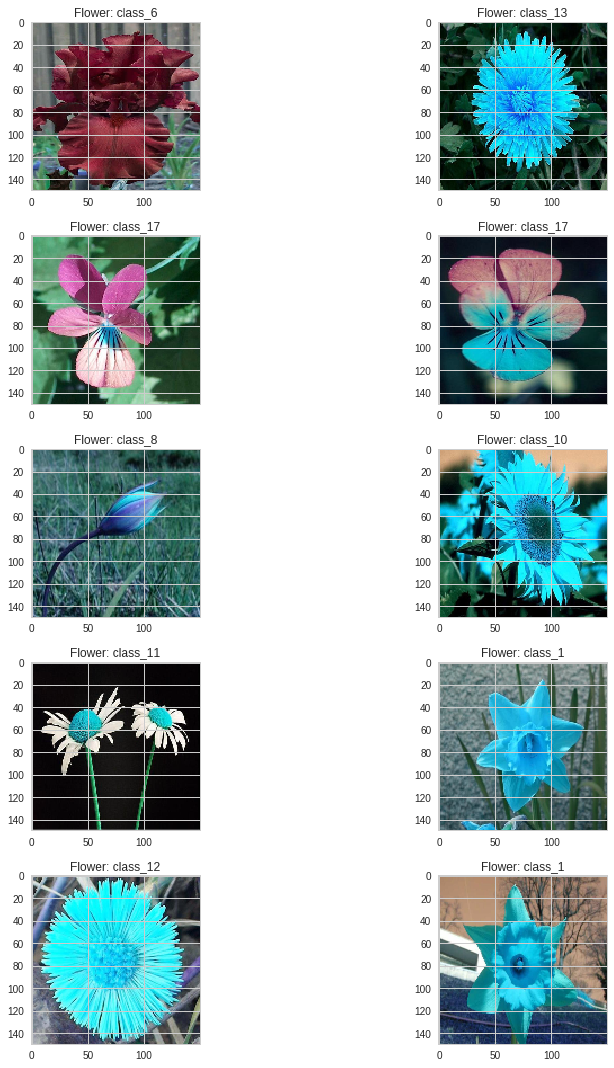

In [0]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,17)
X=np.array(X)
X=X/255


val_Y=le.fit_transform(val_Z)
val_Y=to_categorical(val_Y,17)
val_X=np.array(val_X)
val_X=val_X/255

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
base_model=VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')
 

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 0s 0us/step


In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(layers,activation):
  model=Sequential()
  model.add(base_model)
 
  for i ,nodes in enumerate(layers):
    model.add(Dense(nodes))
    model.add(Activation(activation))
  
  model.add(Dense(17))
  model.add(Activation(activation))
  
  base_model.trainable=False # setting the VGG model to be untrainable.
  model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics=["accuracy"])

  return model

hyp_model= KerasClassifier(build_fn=create_model)





In [0]:



    
layers=[[64,128],[128,256],[128]]
activations=['relu']
learn_rate=[0.01]
epochs=[10]
batch_size=[128,256]

param_grid=dict(layers=layers,activation=activations,batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=hyp_model,param_grid=param_grid)

In [0]:
grid_result=grid.fit(X,Y)

Epoch 1/10
650/650 [==============================] - 4s 6ms/step - loss: 10.8338 - acc: 0.1185
Epoch 2/10
650/650 [==============================] - 3s 5ms/step - loss: 9.7792 - acc: 0.1046
Epoch 3/10
650/650 [==============================] - 3s 5ms/step - loss: 9.7453 - acc: 0.1662
Epoch 4/10
650/650 [==============================] - 3s 5ms/step - loss: 9.7163 - acc: 0.1985
Epoch 5/10
650/650 [==============================] - 3s 5ms/step - loss: 9.6678 - acc: 0.2400
Epoch 6/10
650/650 [==============================] - 3s 5ms/step - loss: 9.5440 - acc: 0.2462
Epoch 7/10
650/650 [==============================] - 3s 5ms/step - loss: 8.9081 - acc: 0.2569
Epoch 8/10
650/650 [==============================] - 3s 5ms/step - loss: 8.1723 - acc: 0.1862
Epoch 9/10
650/650 [==============================] - 3s 5ms/step - loss: 8.1194 - acc: 0.2415
Epoch 10/10
650/650 [==============================] - 3s 4ms/step
Epoch 1/10
651/651 [==============================] - 4s 6ms/step - loss: 5.9

In [0]:
grid_result.best_params_

{'activation': 'relu', 'batch_size': 128, 'epochs': 10, 'layers': [128, 256]}

Usinf best parameter design model

In [0]:
def latest_model():
  l_model=Sequential()
  l_model.add(base_model)
  l_model.add(Dense(128,activation='relu'))
  l_model.add(Dense(256,activation='relu'))
  l_model.add(Dense(17,activation='softmax'))
  return l_model

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X)

fine tuning

In [0]:
for i in range (len(base_model.layers)):
    print (i,base_model.layers[i])
  
for layer in base_model.layers[15:]:
    layer.trainable=True
for layer in base_model.layers[0:15]:
    layer.trainable=False


0 <keras.engine.input_layer.InputLayer object at 0x7f5e61e51240>
1 <keras.layers.convolutional.Conv2D object at 0x7f5e5fad8390>
2 <keras.layers.convolutional.Conv2D object at 0x7f5e5fad8e80>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f5e5fc04b70>
4 <keras.layers.convolutional.Conv2D object at 0x7f5e5faed940>
5 <keras.layers.convolutional.Conv2D object at 0x7f5e5fb15ef0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f5e5d9e9f28>
7 <keras.layers.convolutional.Conv2D object at 0x7f5e5d9e9be0>
8 <keras.layers.convolutional.Conv2D object at 0x7f5e5da0ea58>
9 <keras.layers.convolutional.Conv2D object at 0x7f5e5d9b5208>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f5e5d9cab00>
11 <keras.layers.convolutional.Conv2D object at 0x7f5e5d9ca630>
12 <keras.layers.convolutional.Conv2D object at 0x7f5e5d973358>
13 <keras.layers.convolutional.Conv2D object at 0x7f5e5d98ad68>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f5e5d931668>
15 <keras.layers.convolutional.Conv2D object at 

In [0]:

l_model=latest_model()

l_model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=128
History = l_model.fit_generator(datagen.flow(X,Y, batch_size=batch_size),
                              epochs = 50, validation_data = (val_X,val_Y),
                              verbose = 1, steps_per_epoch=X.shape[0] // batch_size)

Epoch 1/50
7/7 [==============================] - 12s 2s/step - loss: 2.8734 - acc: 0.0748 - val_loss: 2.8512 - val_acc: 0.0990
Epoch 2/50
7/7 [==============================] - 4s 640ms/step - loss: 2.8327 - acc: 0.0687 - val_loss: 2.8142 - val_acc: 0.1042
Epoch 3/50
7/7 [==============================] - 5s 702ms/step - loss: 2.7917 - acc: 0.0861 - val_loss: 2.7830 - val_acc: 0.1198
Epoch 4/50
7/7 [==============================] - 6s 857ms/step - loss: 2.7660 - acc: 0.1109 - val_loss: 2.7583 - val_acc: 0.1406
Epoch 5/50
7/7 [==============================] - 6s 860ms/step - loss: 2.7389 - acc: 0.1710 - val_loss: 2.7366 - val_acc: 0.1927
Epoch 6/50
7/7 [==============================] - 6s 853ms/step - loss: 2.7243 - acc: 0.1943 - val_loss: 2.7136 - val_acc: 0.2240
Epoch 7/50
7/7 [==============================] - 6s 849ms/step - loss: 2.6970 - acc: 0.2711 - val_loss: 2.6904 - val_acc: 0.2448
Epoch 8/50
7/7 [==============================] - 8s 1s/step - loss: 2.6736 - acc: 0.2945 - 

In [0]:
le=LabelEncoder()
test_Y=le.fit_transform(test_Z)
test_Y=to_categorical(test_Y,17)
test_X=np.array(test_X)
test_X=test_X/255




FInding testing accuracy

In [0]:

pred=l_model.predict(test_X)
pred_digits=np.argmax(pred,axis=1)
act_digits = np.argmax(test_Y,axis=1)
print(pred_digits)
print(act_digits)
print(test_Y)


# calculate accuracy
from sklearn import metrics

print('Accuracy=')
print(metrics.accuracy_score(act_digits,pred_digits)*100)

[ 0  0  0  9  0  0  0  0  5  9  9  9  9  0 12 12  9 14 15 11  9 10 10 10
 10 10 10 10 11 10 16 13  9 13  7  8 11 11 11 11  9 11 11 11  8 16 12  8
  5 12  9 13 13 13 13 13 13 13 12 13 14 14 14 14 14 14 14 14 14  8  0  0
  0 15  9  9 15 15  5 11 15 16 16 16 16 16 16 15 16 16 16 16  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2 12  2  2  3  4  3  4  4  4  4  4  4  4
  3  3  4  3  3 12 12  6  4  3  3  4  4  4  4  4  3  4  5 15  5 14  5  5
 13  5  5  5  5  5  5  5  5  3  5  5  7  7  7  7  7  7 13 12 12  5  7  8
  8  8  8  8  8  8  8  0 14  7 13]
[ 0  0  0  0  0  0  0  0  0  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14
 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5 